In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import IPython
import mglearn
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "scripts"))

from utils import *
from img_classify import *
from plotting_functions import *

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

In [2]:
class_df = pd.read_csv('../../datasets/toy-classification.csv')
class_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


In [3]:
regresss_df = pd.read_csv("../../datasets/toy-regression.csv")
regresss_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90


## Dummy Models

### 1. DummyClassifier

In [4]:
from sklearn.dummy import DummyClassifier

X = class_df.drop(columns=['quiz2'])
y = class_df['quiz2']

clf = DummyClassifier(strategy="most_frequent")
clf.fit(X, y)

clf.score(X, y)

0.5238095238095238

In [5]:
clf.predict([[0, 1, 92, 90, 95, 93, 92], [1, 1, 92, 93, 94, 92]])

array(['not A+', 'not A+'], dtype='<U6')

### 2. DummyRegressor

In [6]:
from sklearn.dummy import DummyRegressor

X = regresss_df.drop(columns=["quiz2"])
y = regresss_df["quiz2"]

reg = DummyRegressor()
reg.fit(X, y)

reg.score(X, y)

0.0

In [7]:
reg.predict([[0, 1, 92, 90, 95, 93, 92], [1, 1, 92, 93, 94, 92]])

array([86.28571429, 86.28571429])

## Decision Tree

### 1. DecisionTreeClassifier

In [8]:
X = class_df.drop(columns=['quiz2'])
y = class_df['quiz2']

X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
    X_binary[col] = X_binary[col].apply(lambda x: 1 if x >= 90 else 0)

In [9]:
from sklearn.tree import DecisionTreeClassifier

class_tree = DecisionTreeClassifier()
class_tree.fit(X_binary, y)

class_tree.score(X_binary, y)

0.9047619047619048

In [10]:
class_tree.predict(pd.DataFrame([[0, 1, 0, 0, 1, 1, 1]],
                                columns=X_binary.columns)
)

array(['A+'], dtype=object)

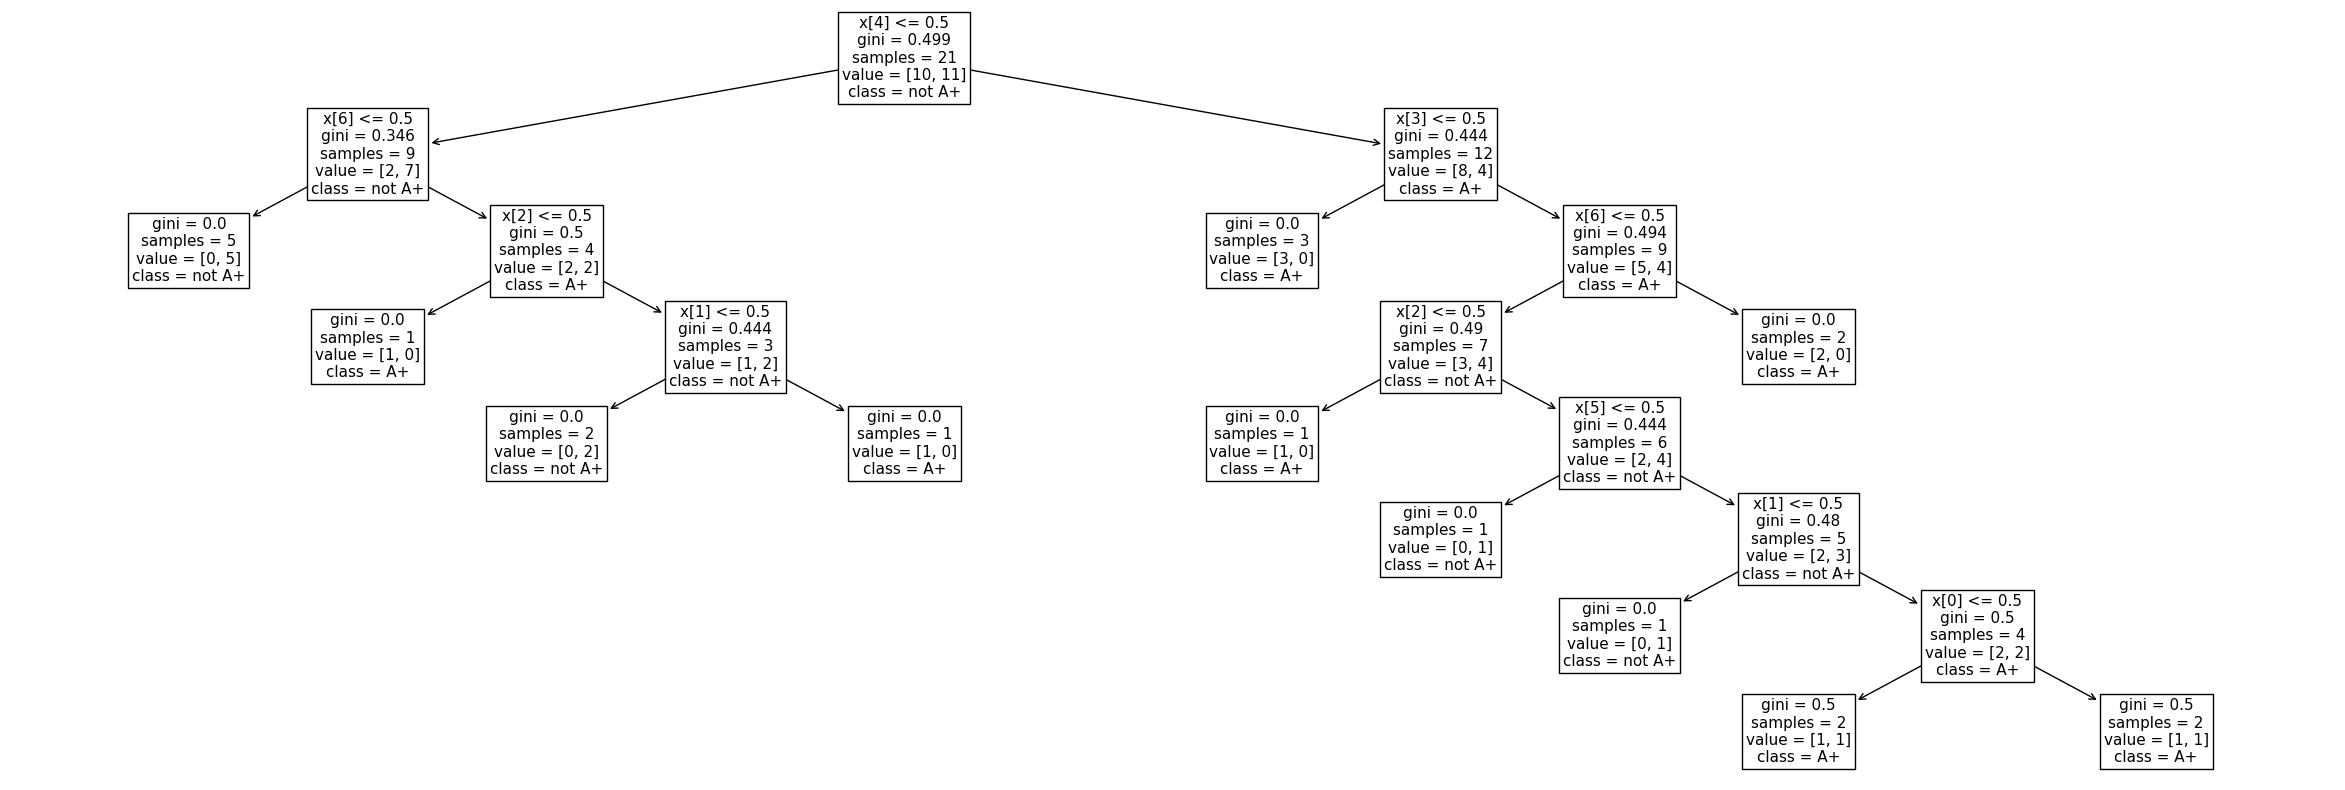

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(class_tree, class_names=['A+', 'not A+']);

### 2. DecisionTreeRegressor

In [12]:
X = regresss_df.drop(columns=["quiz2"])
y = regresss_df["quiz2"]

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X, y)

reg_tree.score(X, y)

0.9885760913912689

In [13]:
reg_tree.predict(pd.DataFrame([[0, 1, 80, 85, 95, 90, 82]], columns=X.columns))

array([90.33333333])

#### Decision Stump

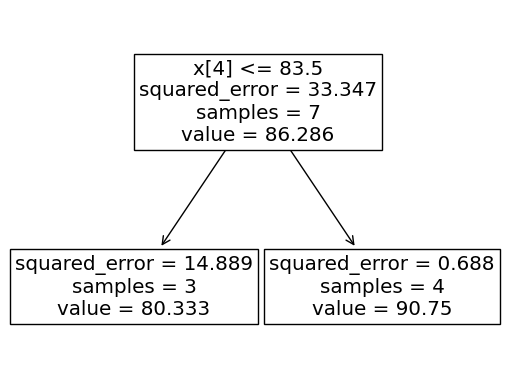

In [14]:
X = regresss_df.drop(columns=["quiz2"])
y = regresss_df["quiz2"]

stump_tree = DecisionTreeRegressor(max_depth=1)
stump_tree.fit(X, y)

plot_tree(stump_tree);

#### Decision Boundary

IndexError: list index out of range

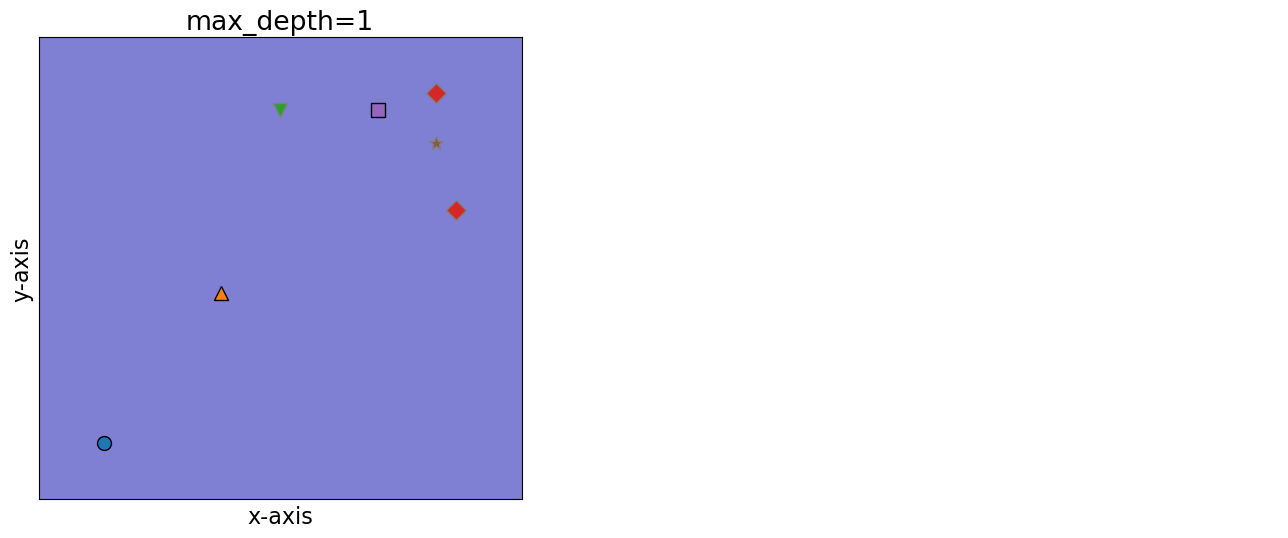

In [15]:
X_subset = X[["lab4", "quiz1"]]

depth = 1  # decision stump
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset.values, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, fontsize=15
)

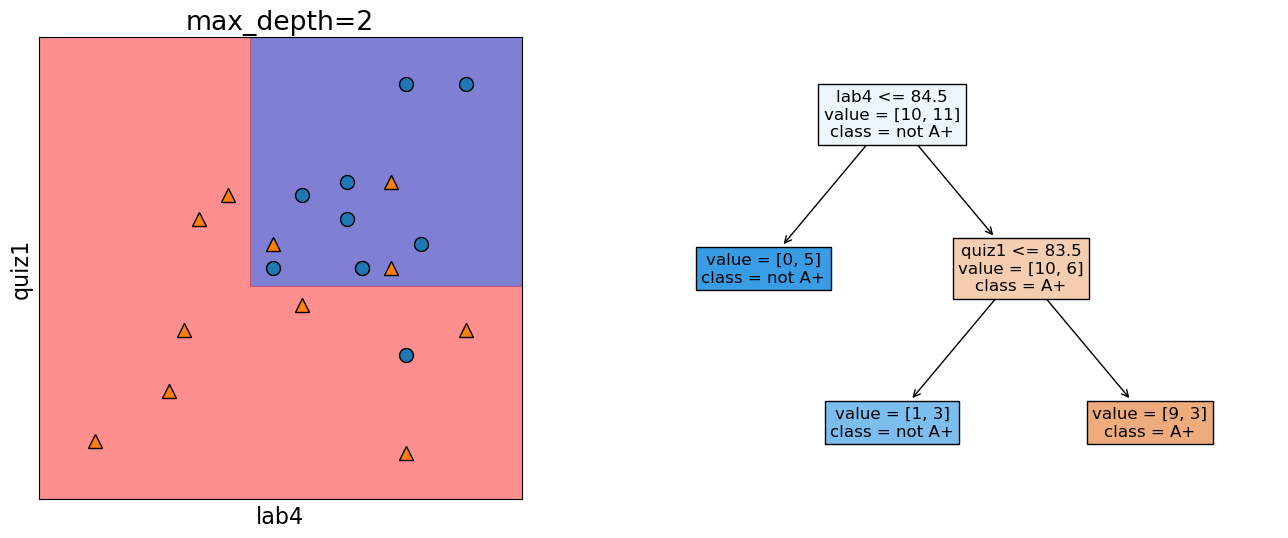

In [ ]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_subset.values, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1", fontsize=12
)

IndexError: list index out of range

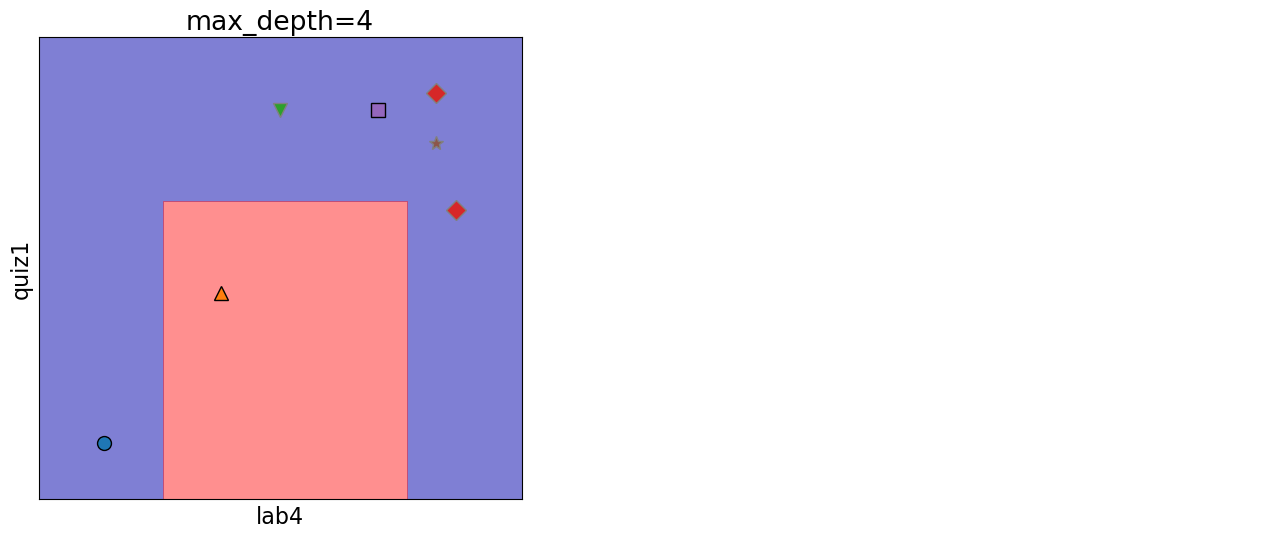

In [16]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_subset.values, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1", fontsize=8
)

## Data Generalisation

In [17]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../datasets/canada_usa_cities.csv")
display(df)
X = df.drop(columns=["country"])
y = df["country"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA
...,...,...,...
204,-72.7218,45.3990,Canada
205,-66.6458,45.9664,Canada
206,-79.2506,42.9931,Canada
207,-72.9406,45.6275,Canada


In [18]:
print('master size:', df.shape)
print('train size:', pd.concat([X_train, y_train], axis=1).shape)
print("test size:", pd.concat([X_test, y_test], axis=1).shape)

master size: (209, 3)
train size: (167, 3)
test size: (42, 3)


In [19]:
# coding a decision tree classifier to classify country based on longitude and latitude

country_classifier = DecisionTreeClassifier()
country_classifier.fit(X_train, y_train)

# train score
print('train score:', country_classifier.score(X_train, y_train))

# test score
print("test score:", country_classifier.score(X_test, y_test))

train score: 1.0
test score: 0.7142857142857143


## Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score, cross_validate

model = DecisionTreeClassifier(max_depth=4)

cross_val_score(model, X_train, y_train, cv=10)

array([0.76470588, 0.82352941, 0.70588235, 0.94117647, 0.82352941,
       0.82352941, 0.70588235, 0.9375    , 0.9375    , 0.9375    ])

In [21]:
cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

{'fit_time': array([0.00211716, 0.0012269 , 0.0011518 , 0.00121093, 0.00110006,
        0.00128198, 0.00113821, 0.00111723, 0.00111222, 0.00108695]),
 'score_time': array([0.00140381, 0.00081491, 0.00083685, 0.00078011, 0.00076795,
        0.00085402, 0.0008409 , 0.00080276, 0.00079179, 0.00079894]),
 'test_score': array([0.76470588, 0.82352941, 0.70588235, 0.94117647, 0.82352941,
        0.82352941, 0.70588235, 0.9375    , 0.9375    , 0.9375    ]),
 'train_score': array([0.91333333, 0.90666667, 0.90666667, 0.9       , 0.90666667,
        0.91333333, 0.92      , 0.90066225, 0.90066225, 0.90066225])}